In [96]:
import matplotlib.pyplot as plt

In [97]:
%matplotlib inline

In [98]:
import pandas as pd

In [99]:
import numpy as np

In [100]:
dados = pd.read_csv('Consumo_cerveja.csv', sep=';')

In [101]:
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [102]:
dados.shape

(365, 7)

In [103]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [104]:
# Verificar tipos de dados
print(dados.dtypes)

# Converter colunas de data (exemplo)
dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')

# Criar coluna numérica a partir da data (se necessário)
dados['data_num'] = dados['data'].astype('int64')

# Selecionar apenas colunas numéricas
dados_numericos = dados.select_dtypes(include=['number'])

# Calcular correlação
correlacao = dados_numericos.corr().round(4)
print(correlacao)

data           object
temp_media    float64
temp_min      float64
temp_max      float64
chuva         float64
fds             int64
consumo         int64
dtype: object
            temp_media  temp_min  temp_max   chuva     fds  consumo  data_num
temp_media      1.0000    0.8628    0.9225  0.0244 -0.0508   0.5746   -0.0986
temp_min        0.8628    1.0000    0.6729  0.0986 -0.0595   0.3925   -0.1701
temp_max        0.9225    0.6729    1.0000 -0.0493 -0.0403   0.6427   -0.0689
chuva           0.0244    0.0986   -0.0493  1.0000  0.0016  -0.1938    0.0075
fds            -0.0508   -0.0595   -0.0403  0.0016  1.0000   0.5060   -0.0060
consumo         0.5746    0.3925    0.6427 -0.1938  0.5060   1.0000    0.0435
data_num       -0.0986   -0.1701   -0.0689  0.0075 -0.0060   0.0435    1.0000


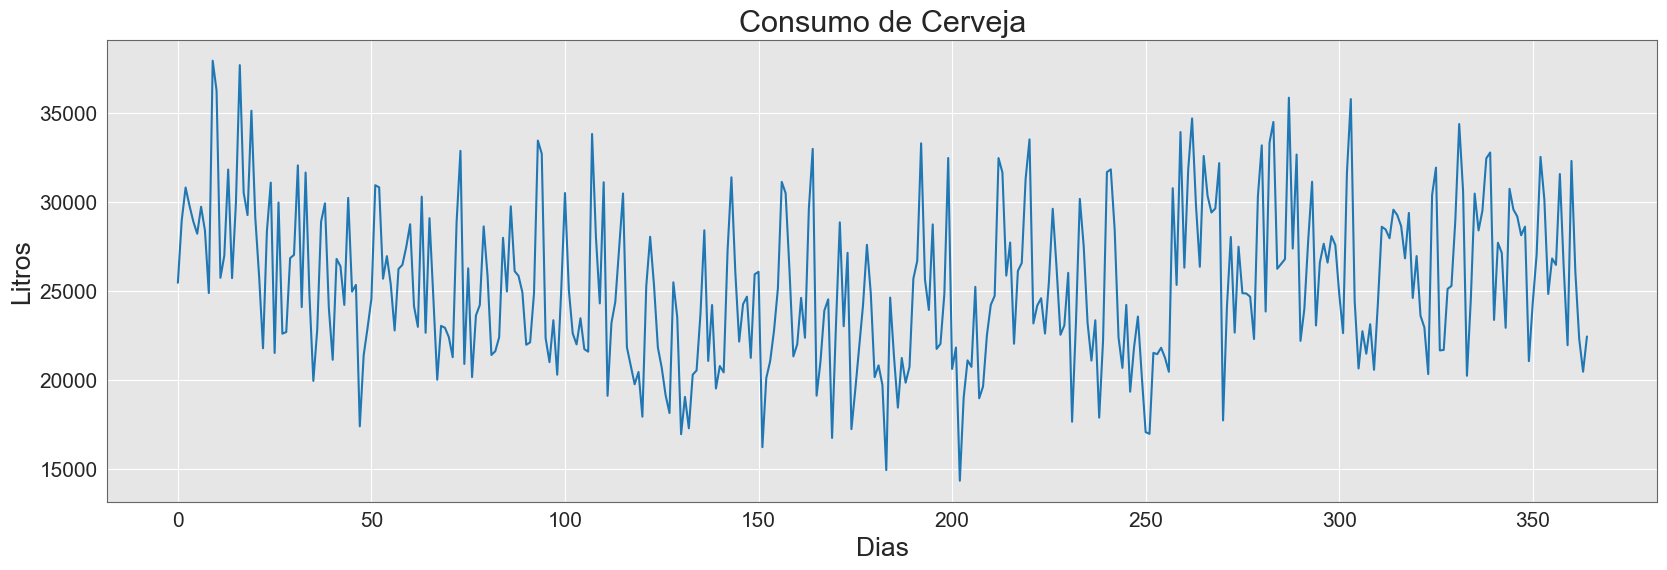

In [105]:
fig, ax = plt.subplots(figsize=(20,6))
ax.set_title('Consumo de Cerveja', fontsize=22)
ax.set_ylabel('Litros', fontsize=19)
ax.set_xlabel('Dias', fontsize=19)
ax = dados['consumo'].plot(fontsize=15)

In [106]:
import seaborn as sns

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

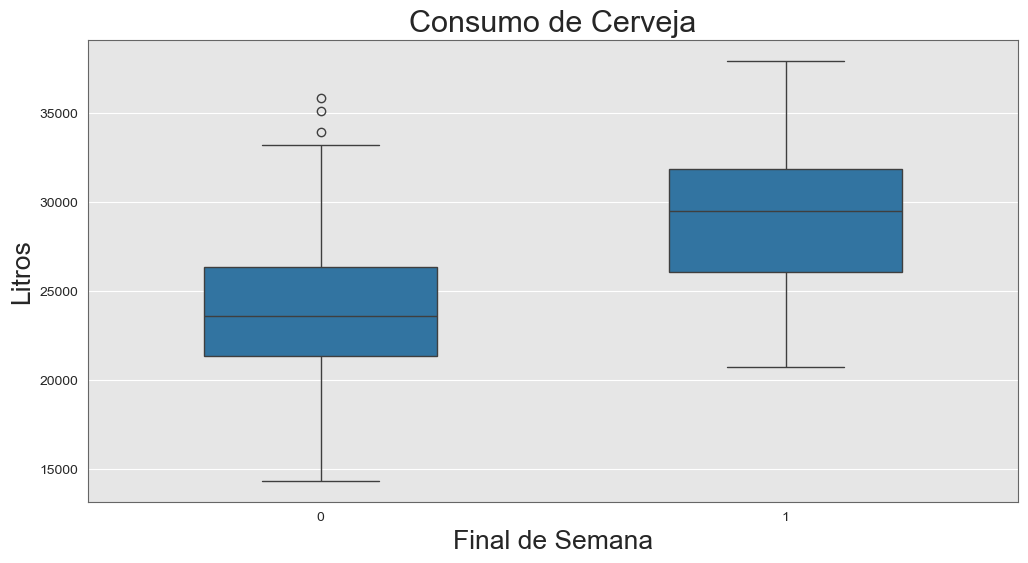

In [107]:
ax = sns.boxplot(y = 'consumo', x= 'fds', data=dados, orient= 'v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja', fontsize=22)
ax.set_ylabel('Litros', fontsize=19)
ax.set_xlabel('Final de Semana', fontsize=19)
ax

C:\Users\clayton.silva\AppData\Local\Temp\ipykernel_6848\3381957471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['consumo'])


<Axes: title={'center': 'Distribuição de Frequência'}, xlabel='consumo', ylabel='Consumo de cerveja'>

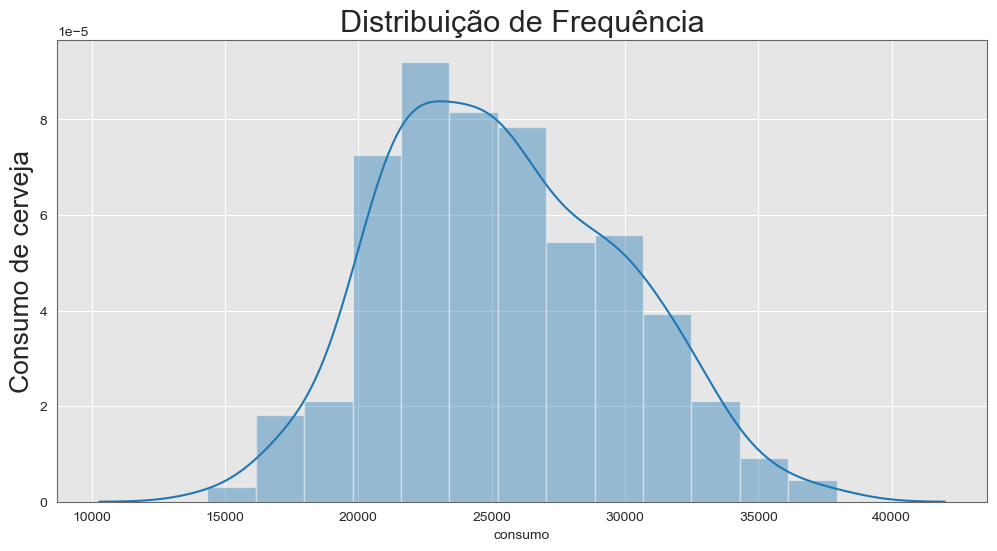

In [108]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência', fontsize=22)
ax.set_ylabel('Consumo de cerveja', fontsize=19)
ax

<Axes: title={'center': 'Distribuição de Frequência'}, xlabel='consumo', ylabel='Consumo de cerveja'>

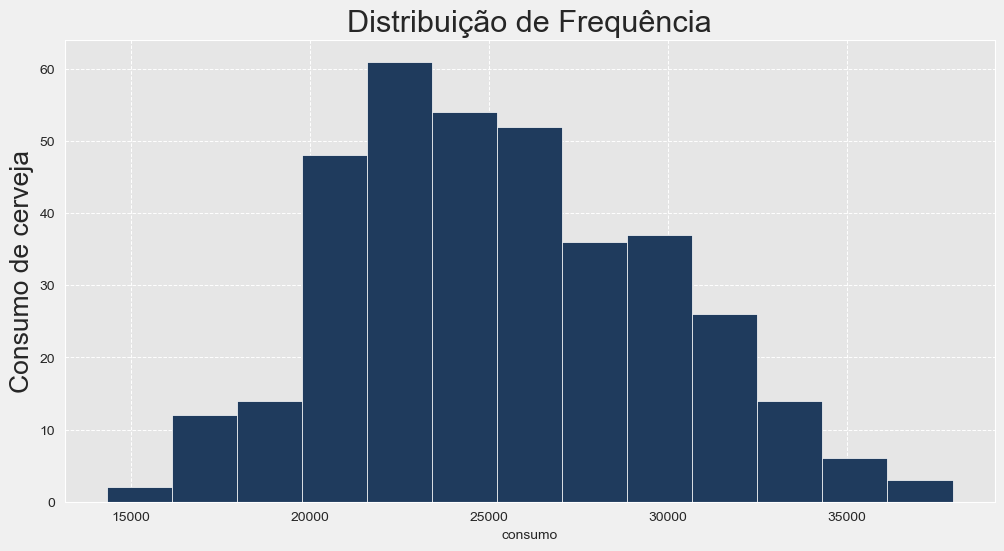

In [109]:
# Configurar o estilo do Seaborn para fundo cinza claro
sns.set_style("darkgrid", {"axes.facecolor": ".9"})  # .9 = cinza muito claro

# Criar o gráfico
ax = sns.histplot(
    dados['consumo'],
    color='#1f3b5d',         # Azul escuro
    edgecolor='white',       # Borda branca para destacar
    linewidth=0.5,           # Espessura da borda
    alpha=1,                 # Opacidade total
    kde=False                # Remove a linha de densidade
)

# Ajustes estéticos adicionais
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência', fontsize=22)
ax.set_ylabel('Consumo de cerveja', fontsize=19)

# Ajustar cores do grid
ax.grid(color='white', linestyle='--', linewidth=0.7)

# Opcional: fundo da figura também em cinza
ax.figure.set_facecolor('#f0f0f0')

ax

C:\Users\clayton.silva\AppData\Local\Temp\ipykernel_6848\4072467547.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(


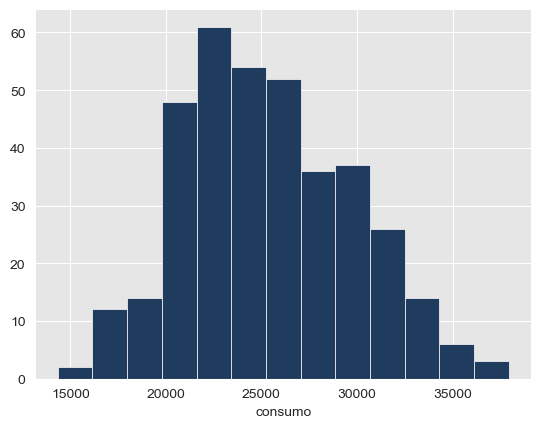

In [110]:
ax = sns.distplot(
    dados['consumo'],
    hist_kws={
        'color': '#1f3b5d',
        'edgecolor': 'white',
        'linewidth': 0.5,
        'alpha': 1
    },
    kde=False
)

<Axes: title={'center': 'Distribuição de Frequência'}, xlabel='Consumo de cerveja', ylabel='Densidade'>

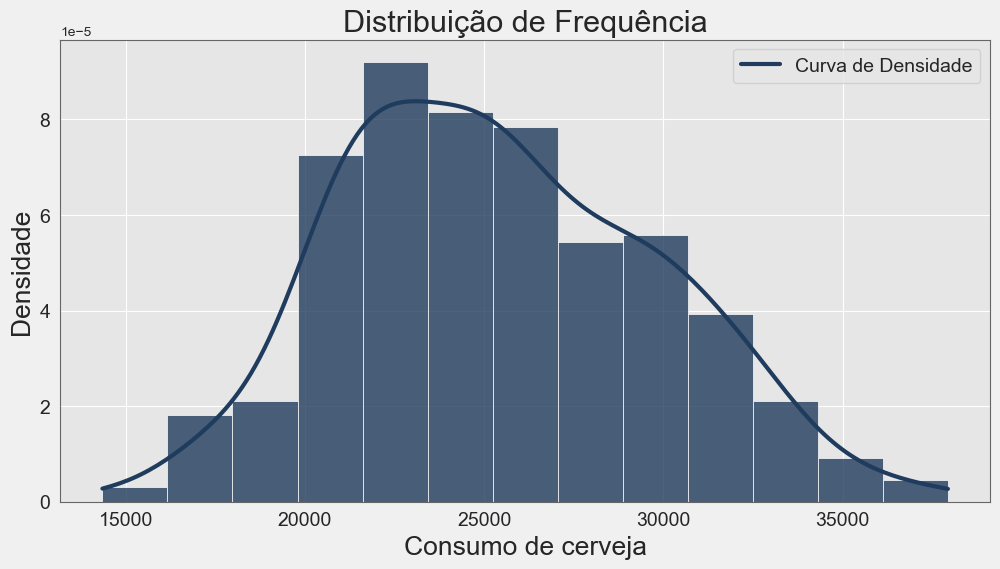

In [111]:
# Configurar o estilo
sns.set_style("darkgrid", {
    "axes.facecolor": ".9",          # Fundo cinza claro
    "grid.color": "white",           # Linhas do grid brancas
    "axes.edgecolor": ".4"           # Borda do gráfico cinza
})

# Criar o gráfico
ax = sns.histplot(
    dados['consumo'],
    color='#1f3b5d',                 # Azul escuro para as barras
    edgecolor='white',                # Borda branca
    linewidth=0.5,
    alpha=0.8,
    kde=True,                        # Adiciona a curva de densidade
    stat='density',                  # Para alinhar escala do KDE
    line_kws={'color': '#c72e29',    # Vermelho para a curva
              'linewidth': 3,
              'label': 'Curva de Densidade'}
)

# Ajustes finais
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência', fontsize=22)
ax.set_ylabel('Densidade', fontsize=19)
ax.set_xlabel('Consumo de cerveja', fontsize=19)
ax.legend(prop={'size': 14})

# Fundo da figura
ax.figure.set_facecolor('#f0f0f0')

# Ajustar ticks
ax.tick_params(axis='both', which='major', labelsize=14)

ax

C:\Users\clayton.silva\AppData\Local\Temp\ipykernel_6848\1674129230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(


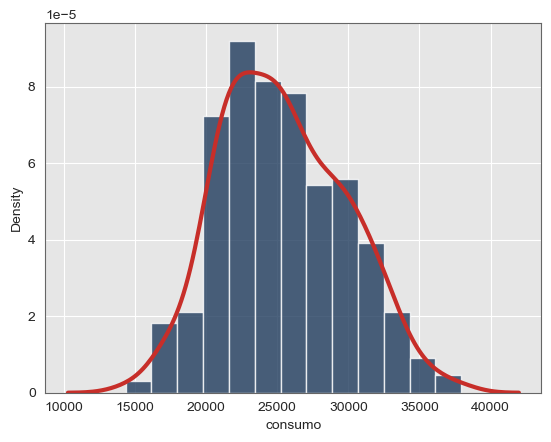

In [112]:
ax = sns.distplot(
    dados['consumo'],
    hist_kws={
        'color': '#1f3b5d',
        'edgecolor': 'white',
        'alpha': 0.8
    },
    kde_kws={
        'color': '#c72e29',
        'linewidth': 3,
        'label': 'Curva de Densidade'
    }
)

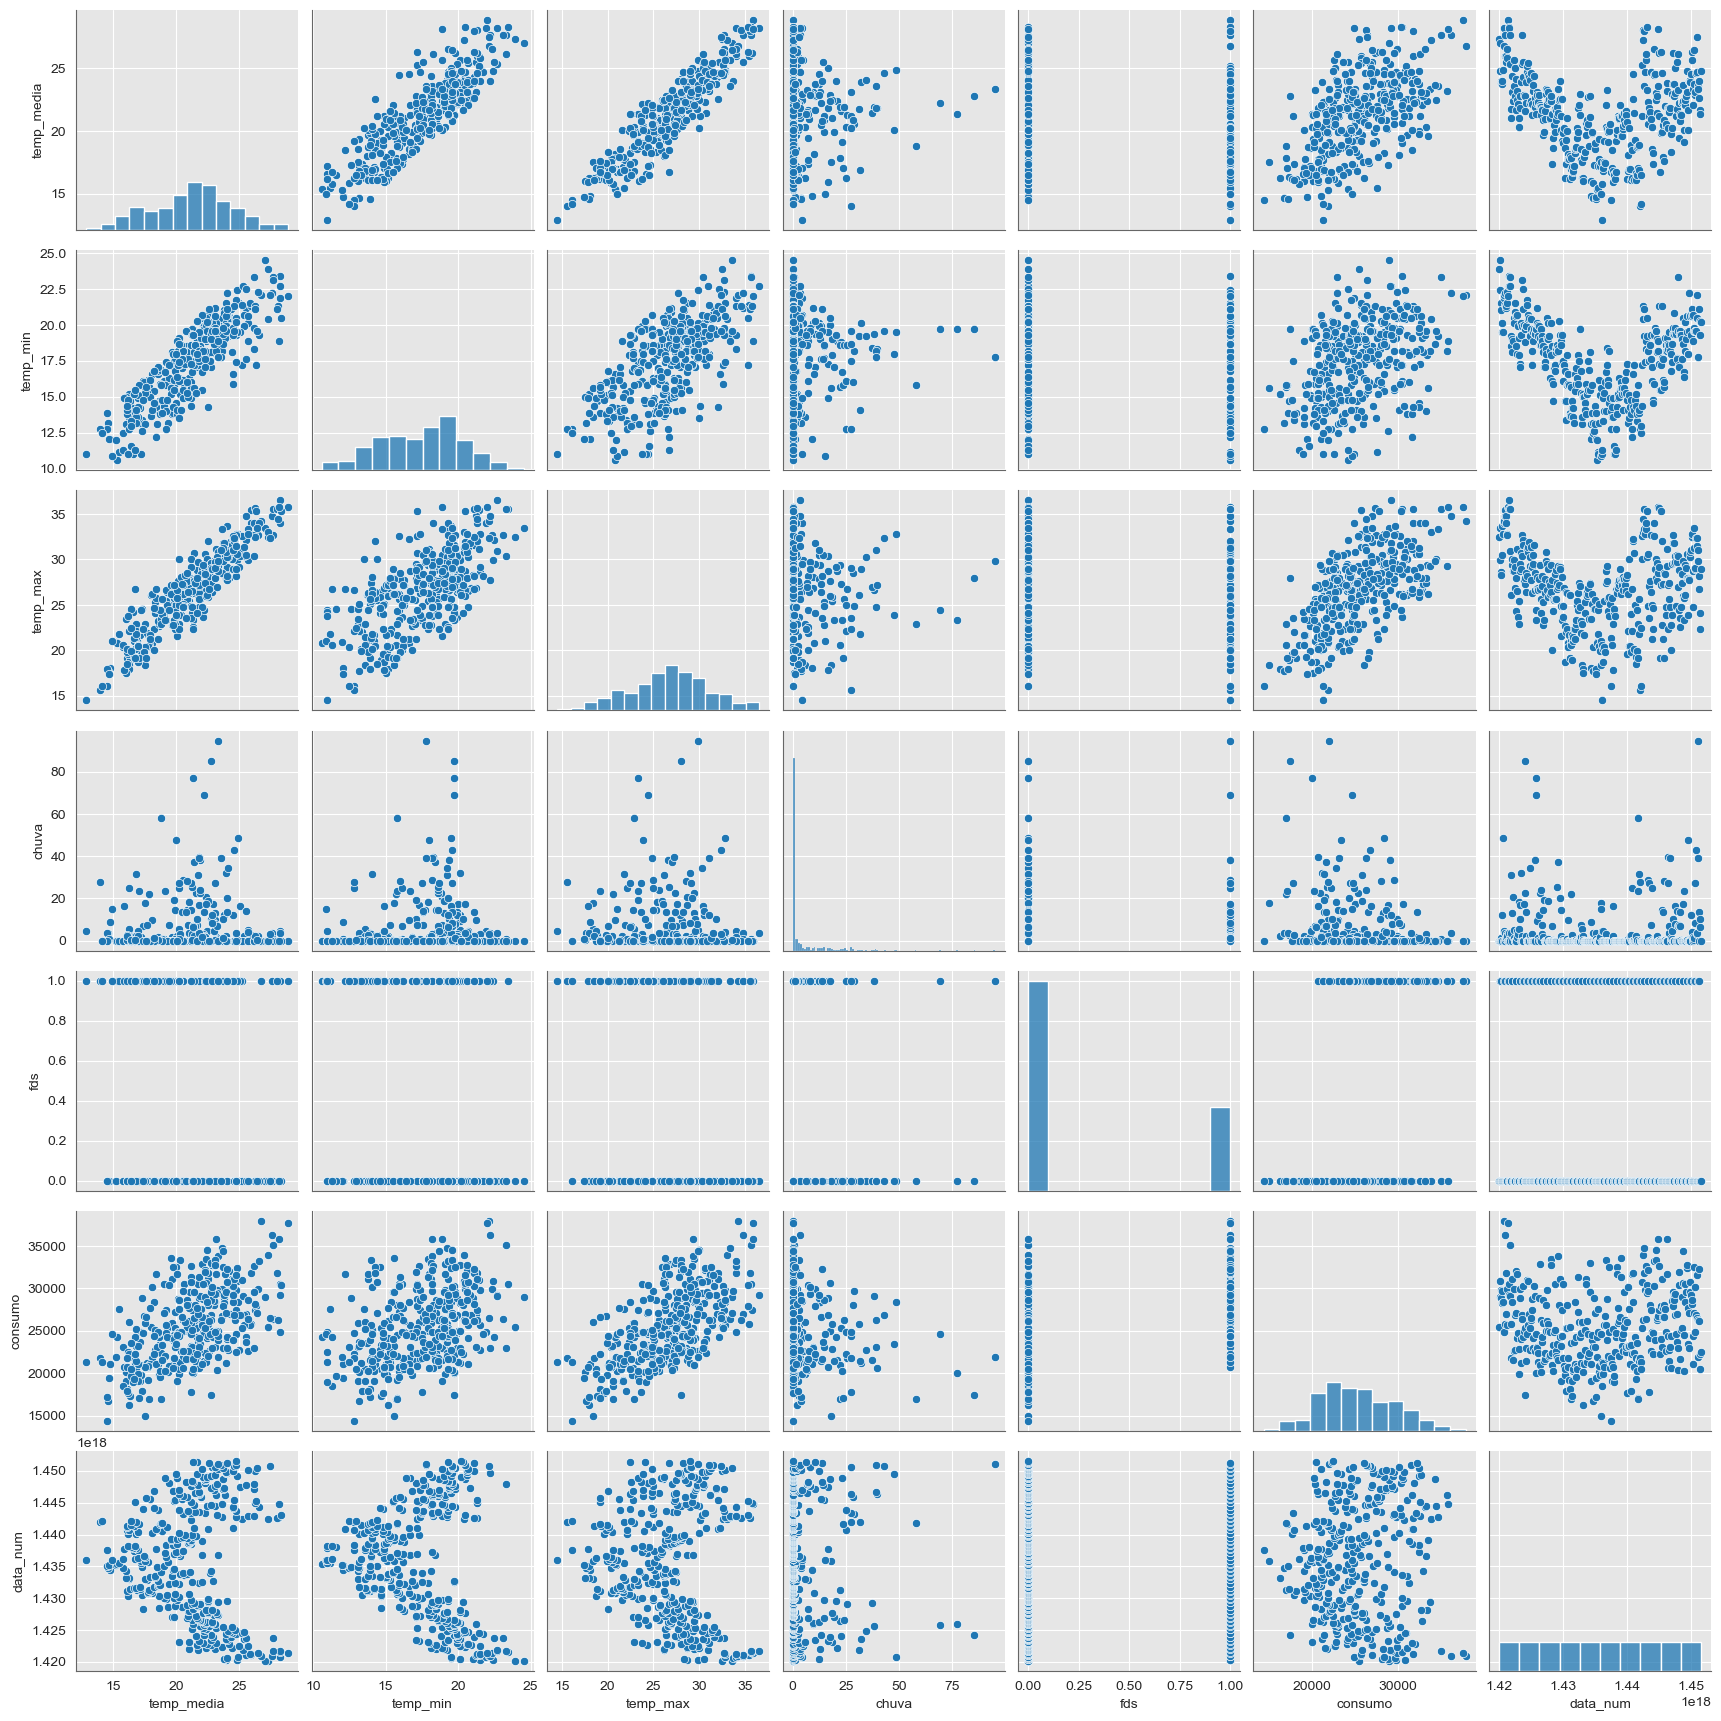

In [113]:
ax = sns.pairplot(dados)

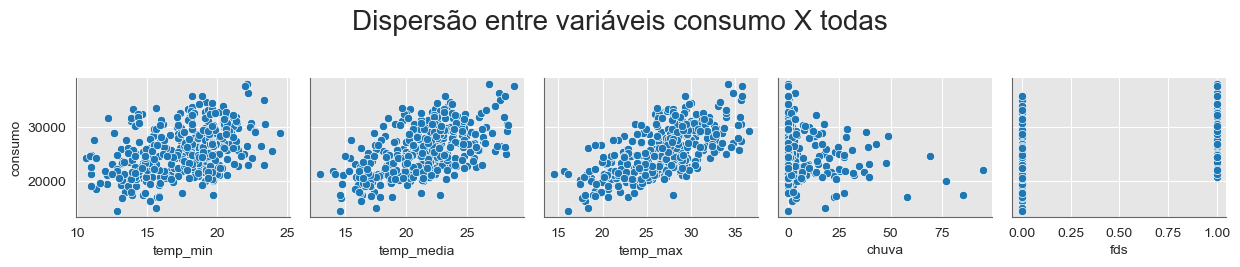

In [114]:
ax = sns.pairplot(
    dados,
    y_vars='consumo',
    x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds']
)

# Ajustar o título principal
ax.figure.suptitle(
    'Dispersão entre variáveis consumo X todas',
    fontsize=20,
    y=1.05  # Ajuste vertical para cima da grade de gráficos
)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

In [115]:
# Para eixos X compartilhados
ax.set(xlabel='Variáveis Explicativas', ylabel='Consumo de Cerveja')

# Ajustar ainda mais o espaçamento
plt.subplots_adjust(hspace=0.3, wspace=0.3)

<Figure size 640x480 with 0 Axes>

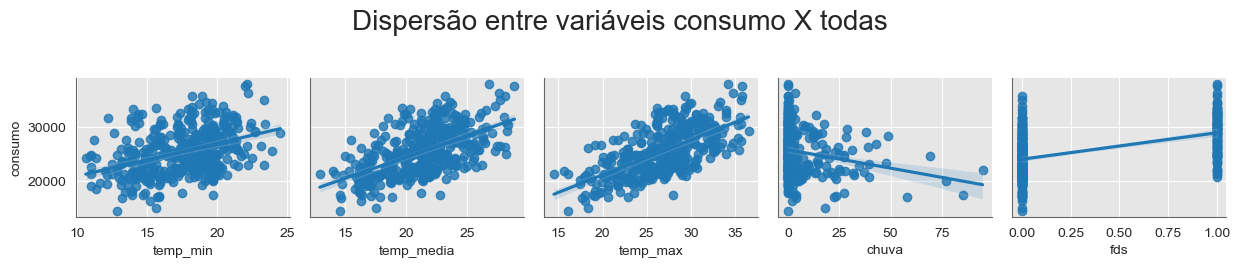

In [116]:
ax = sns.pairplot(
    dados,
    y_vars='consumo',
    x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg'
)

# Ajustar o título principal
ax.figure.suptitle(
    'Dispersão entre variáveis consumo X todas',
    fontsize=20,
    y=1.05  # Ajuste vertical para cima da grade de gráficos
)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

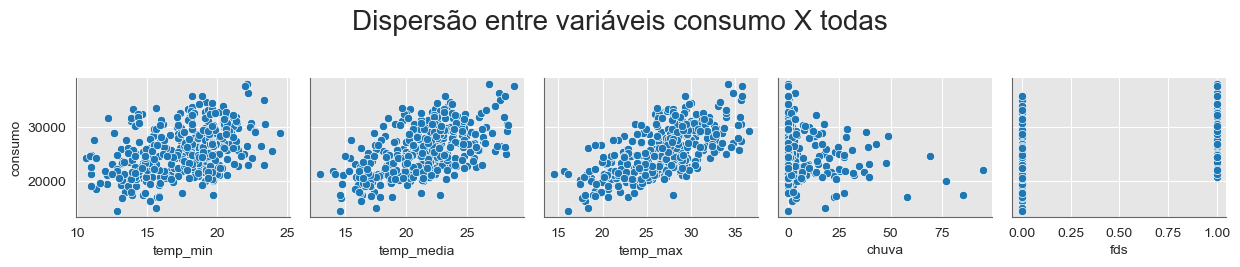

In [117]:
ax = sns.pairplot(
    dados,
    y_vars='consumo',
    x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds']
)

# Ajustar o título principal
ax.figure.suptitle(
    'Dispersão entre variáveis consumo X todas',
    fontsize=20,
    y=1.05  # Ajuste vertical para cima da grade de gráficos
)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

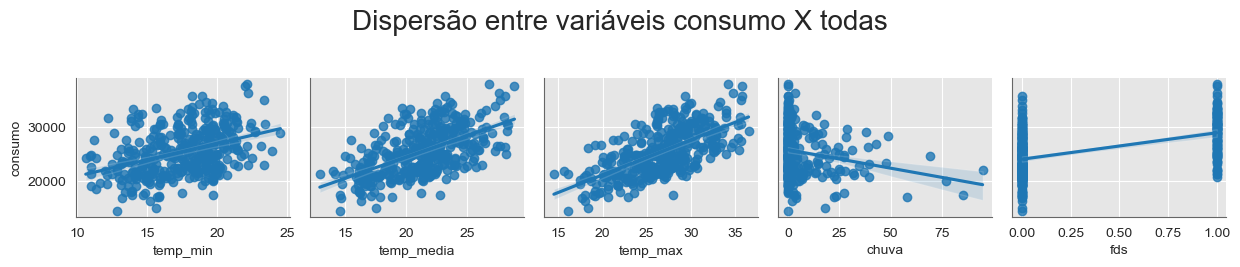

In [118]:
ax = sns.pairplot(
    dados,
    y_vars='consumo',
    x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg'
)

# Ajustar o título principal
ax.figure.suptitle(
    'Dispersão entre variáveis consumo X todas',
    fontsize=20,
    y=1.05  # Ajuste vertical para cima da grade de gráficos
)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

Text(0.5, 1.2, 'Dispersão entre variáveis consumo X todas')

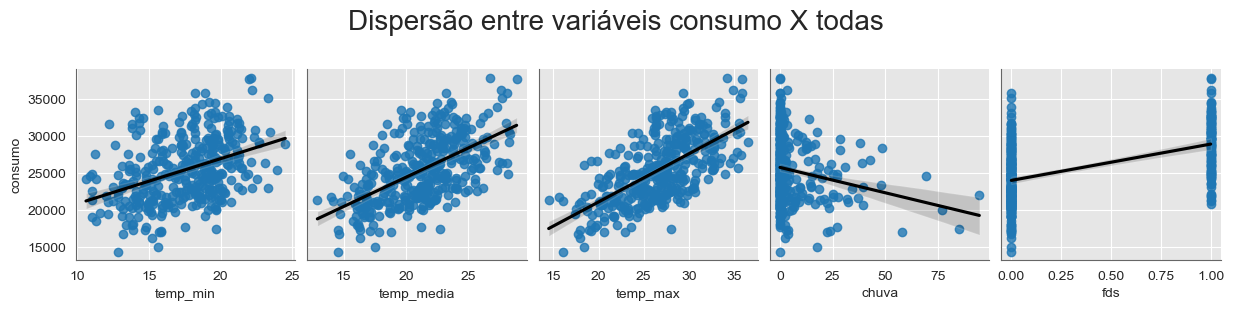

In [119]:
ax = sns.pairplot(
    dados,
    y_vars='consumo',
    x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'],
    kind='reg',
    plot_kws={
        'line_kws': {'color': 'black'},  # Linha de regressão preta
        'scatter_kws': {'color': '#1f77b4'}  # Opcional: cor dos pontos
    }
)

# Título principal
ax.figure.suptitle(
    'Dispersão entre variáveis consumo X todas',
    fontsize=20,
    y=1.2
)

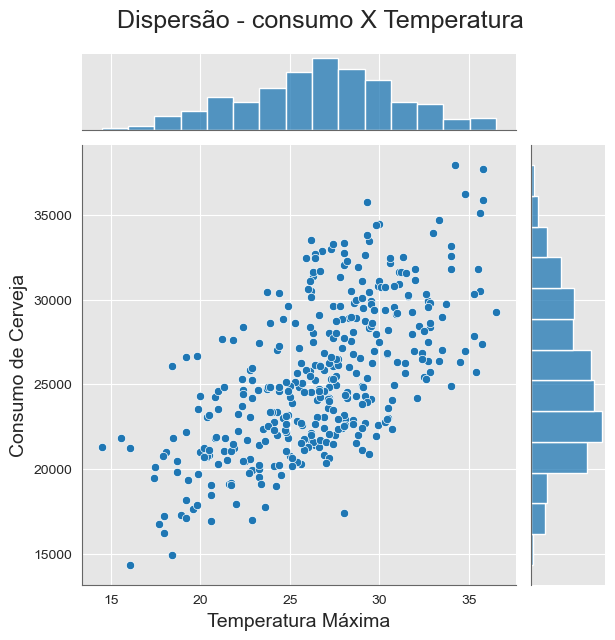

In [121]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados)
ax.fig.suptitle('Dispersão - consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)
ax

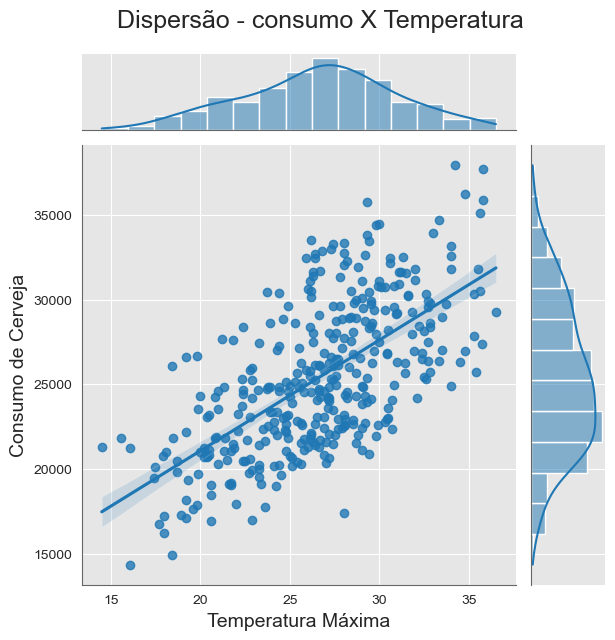

In [129]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados, kind="reg")
ax.fig.suptitle('Dispersão - consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)
ax